In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [0]:
data = sns.load_dataset('titanic')

In [52]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
data=data.drop(['deck'], axis=1)

In [56]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [0]:
def age(cloumns):
    age=cloumns[0]
    pclass=cloumns[1]
    
    
    if pd.isnull(age):
        if pclass == 1:
            return data[data['pclass'] == 1] ['age'].mean()
        if pclass == 2:
            return data[data['pclass'] == 2] ['age'].mean()
        if pclass == 3:
            return data[data['pclass'] == 3] ['age'].mean()
          
    else:
      
        return age

In [0]:


data['age']= data[['age', 'pclass']].apply(age, axis=1)

In [59]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [0]:
data['embarked'].fillna('s', inplace=True)

In [61]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

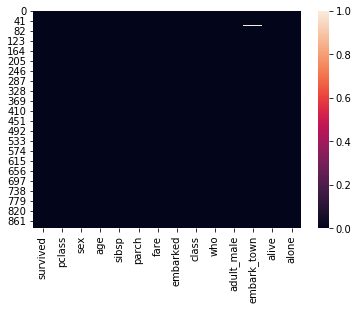

In [62]:
sns.heatmap(data.isnull())

In [0]:
data= data.drop(['embark_town'], axis=1)
data = data.drop(['alive'], axis=1)

In [0]:
data['fare'] = data['fare'].astype('int')
data['age'] = data['age'].astype('int')
data['pclass'] = data['pclass'].astype('int')


In [65]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22,1,0,7,S,Third,man,True,False
1,1,1,female,38,1,0,71,C,First,woman,False,False
2,1,3,female,26,0,0,7,S,Third,woman,False,True
3,1,1,female,35,1,0,53,S,First,woman,False,False
4,0,3,male,35,0,0,8,S,Third,man,True,True


In [0]:
data= data.drop(['class'], axis=1)

In [0]:


dummy = pd.get_dummies(data['sex'],drop_first=True)

In [0]:
data = pd.concat([data, dummy], axis=1)

In [0]:
data= data.drop(['sex'], axis=1)

In [0]:
data=data.drop(['who'], axis =1 )

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [72]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,alone,male
0,0,3,22,1,0,7,S,True,False,1
1,1,1,38,1,0,71,C,False,False,0
2,1,3,26,0,0,7,S,False,True,0
3,1,1,35,1,0,53,S,False,False,0
4,0,3,35,0,0,8,S,True,True,1


In [73]:
data['adult_male'] = le.fit_transform(data['adult_male'])
data['adult_male'].unique()

array([1, 0])

In [74]:
data['alone'] = le.fit_transform(data['alone'])
data['alone'].unique()

array([0, 1])

In [75]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,alone,male
0,0,3,22,1,0,7,S,1,0,1
1,1,1,38,1,0,71,C,0,0,0
2,1,3,26,0,0,7,S,0,1,0
3,1,1,35,1,0,53,S,0,0,0
4,0,3,35,0,0,8,S,1,1,1


In [77]:
data['embarked'] = le.fit_transform(data['embarked'])
data['embarked'].unique()

array([2, 0, 1, 3])

In [78]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,alone,male
0,0,3,22,1,0,7,2,1,0,1
1,1,1,38,1,0,71,0,0,0,0
2,1,3,26,0,0,7,2,0,1,0
3,1,1,35,1,0,53,2,0,0,0
4,0,3,35,0,0,8,2,1,1,1


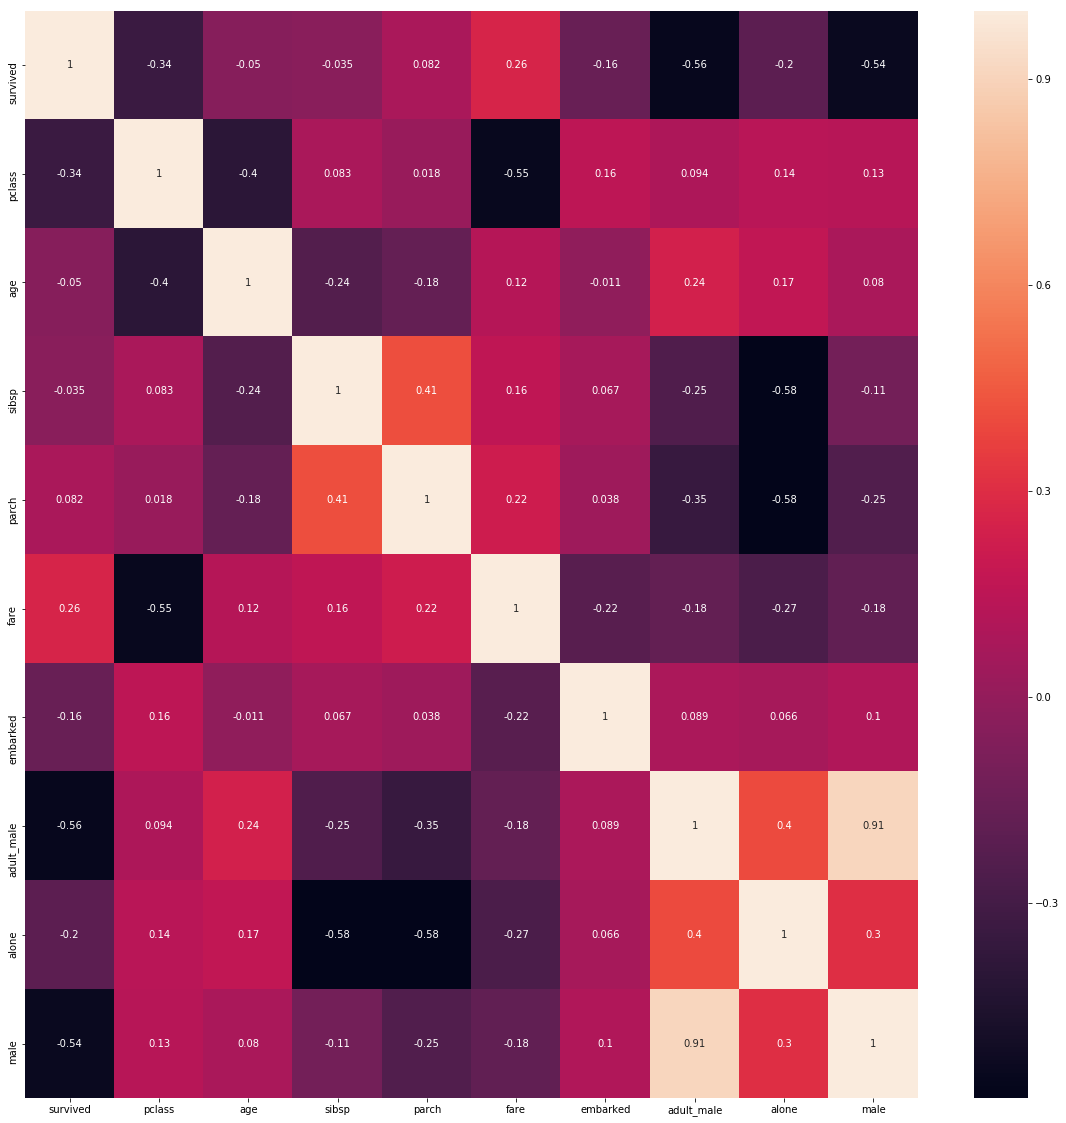

In [79]:
corrmat=data.corr()
tf=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[tf].corr(), annot=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
X = data.drop('survived', axis = 1)
y = data['survived']


In [0]:
from sklearn.feature_selection import RFE

In [83]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [84]:
XX = X[X.columns[rfe.support_]]

XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.4, random_state = 8, stratify = y)

In [0]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
results = confusion_matrix(y_test,y_predict) 

In [89]:
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[203  17]
 [ 40  97]]


In [90]:
print ('Accuracy Score :',accuracy_score(y_test, y_predict)) 
print ('Report : ')
print (classification_report(y_test, y_predict)) 

Accuracy Score : 0.8403361344537815
Report : 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       220
           1       0.85      0.71      0.77       137

    accuracy                           0.84       357
   macro avg       0.84      0.82      0.82       357
weighted avg       0.84      0.84      0.84       357



In [91]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


In [92]:
print(data['survived'])

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [48]:
print(data['alive'])

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64


In [49]:
data['survived'] is data['alive']

False